In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn import svm 
from sklearn import metrics 
import seaborn as sb 
import matplotlib.pyplot as plt 

In [3]:
data = load_breast_cancer()

In [4]:
print(data.target_names)

['malignant' 'benign']


In [5]:
print(data.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [7]:
x = data.data
y = data.target

In [9]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=True,test_size=0.2)

In [12]:
model = svm.SVC(kernel="linear",probability=True,verbose=True)

In [13]:
model.fit(x_train,y_train)

[LibSVM]................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

SVC(kernel='linear', probability=True, verbose=True)

In [14]:
y_pred = model.predict(x_test)

In [15]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [16]:
results={}

In [25]:
TP,FN,FP,TN = metrics.confusion_matrix(y_test,y_pred,labels=[1,0]).ravel()

In [26]:
results['accuracy']=(TP+TN) / (TP + FN + TN + FP)
results['precision'] = TP/(TP + FP)
results['recall'] = TP/(TP+FN)
results['f1_score'] = (2*results['precision']*results['recall'])/(results['precision']+results['recall'])
results['mcc'] = ((TP*TN)-(FP*FN))/( (TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**0.5


In [27]:
results['accuracy']
# metrics.accuracy_score(y_test,y_pred)

0.956140350877193

In [28]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred)

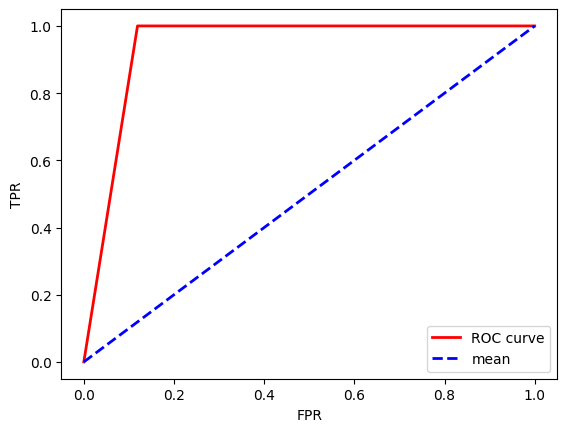

In [36]:
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve')
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--',label='mean')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()